# Data Science and Business Analytics

# The Sparks Foundation

## Author : Rahul Verma

## Internship

### Prediction using Supervised ML
### Task 1 - Predict the percentage of an student based on the no. of study hours.

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## data importing with pandas library.
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Let's have a view on data:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the data:

Text(0.5, 1.0, 'Hours vs percentage ')

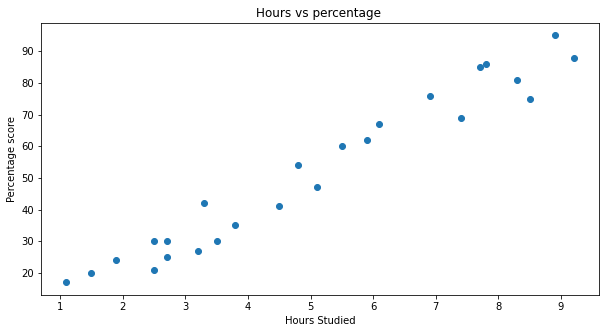

In [4]:
# Let's plot our data on a graph to find any relationship between the data.

plt.figure(figsize=(10,5))
plt.scatter(x = 'Hours', y = 'Scores', data= data)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.title('Hours vs percentage ')

### we can conclude from graph that the variables are moving in the same direction, if the no. of hours increases the number of score also increases.

## Preparing the data

In [5]:
# Declare the independent and dependent variables for model building
# As we have to predict the score of the students, which depend on hours of study
# So we get to know that X is the independent variable('Hours')
# And y is the dependent variable('Scores') which is depend on X

X = data.iloc[:, :-1].values  # independent variable 
y = data.iloc[:, 1].values  # dependent variable

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [7]:
# For trainig the data we export the LinearRegression from sklearn library

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


In [8]:
# Intercept- it is the y intercept, which means the minimum marks score by the students
regressor.intercept_

3.6612436070861563

In [9]:
# Coefficent :- it is the slope of the parameter X, which shows at what rate the X('Hours') changes 
regressor.coef_

array([9.66978239])

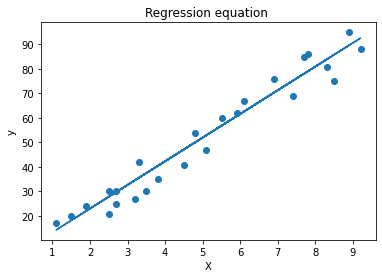

In [10]:
# Plotting the regression line
# As we know the regression equation is 

# Y= b + b1(X) + e,
# b = intercept, b1 = coefficient, e = error

line = regressor.intercept_+regressor.coef_*X

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression equation ')
plt.show()

## Making Predictions:

Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
# Now we make prediction on the test data

y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([52.97713378, 27.83569957, 18.16591719, 29.76965605, 40.40641668])

In [12]:
# Comparing: Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,47,52.977134
1,21,27.835700
2,20,18.165917
3,30,29.769656
4,35,40.406417


In [13]:
Error = data['Actual']- data['Predicted']
Error

0   -5.977134
1   -6.835700
2    1.834083
3    0.230344
4   -5.406417
dtype: float64

In [14]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.10673068720521


## Evaluating the model:


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.056735358754681


In [16]:
# R Square will tell us how efficent our model will work

print('R_Square: ', regressor.score(X,y))

R_Square:  0.9521558713128586
